In [1]:
STUDY_PATH = '/data/GitHub/2018/variability_jlca/'

In [2]:
import sys
sys.path.append(STUDY_PATH)

In [3]:
from lca_variability import lca_variability
import os
mv_path = os.path.join(STUDY_PATH, 'mkt_var_cutoff.json')

In [4]:
from antelope_catalog import LcCatalog
cat = LcCatalog(os.path.join(STUDY_PATH, 'catalog'), quell_biogenic_CO2=True)

Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/flowable_synlist.json:
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/quantity_synlist.json:
local.qdb: /data/GitHub/2018/variability_jlca/catalog/reference-quantities.json
Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/reference-quantities.json:
local.qdb: /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json
25 new quantity entities added (25 total)
6 new flow entities added (6 total)


In [5]:
mkts = lca_variability.MarketIterator.restore(mv_path, cat)

local.lcia.ecoinvent.3.1: /data/LCI/Ecoinvent/LCIA/LCIA implementation v3.1 2014_08_13.xlsx
Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/cache/cfa3982d248fbdf0224e3ebad316063c182bbbbd.json.gz:
local.lcia.ecoinvent.3.1: /data/GitHub/2018/variability_jlca/catalog/cache/cfa3982d248fbdf0224e3ebad316063c182bbbbd.json.gz
703 new quantity entities added (703 total)
3255 new flow entities added (3255 total)
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02


In [6]:
mkts

In [7]:
len(mkts)

3341

In [8]:
cat.show_interfaces()

local.ecoinvent.3.4.apos [basic, inventory]
local.ecoinvent.3.4.apos.index.20190118 [background, basic, index]
local.ecoinvent.3.4.conseq [basic, inventory]
local.ecoinvent.3.4.cutoff [basic, inventory]
local.ecoinvent.3.4.cutoff.index.20190118 [background, basic, index]
local.lcia.ecoinvent.3.1 [basic, index, quantity]
local.qdb [basic, index, quantity]


In [9]:
mkts[2]._scores

{('ReCiPe Midpoint (H), climate change, GWP100',
  '26b3fc08-16a4-4e76-8e5c-d0cb870bd6d0'): -2.8507061141313326,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  '26b3fc08-16a4-4e76-8e5c-d0cb870bd6d0'): -0.00035185998859346213,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  '26b3fc08-16a4-4e76-8e5c-d0cb870bd6d0'): -0.0005138159088310136,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  '26b3fc08-16a4-4e76-8e5c-d0cb870bd6d0'): -0.00020363445479063913}

## Dataframe


In [10]:
m_gly = next(cat.query('local.ecoinvent.3.4.cutoff').processes(Name='market for glycerine'))

Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz:
local.ecoinvent.3.4.cutoff.index.20190118: /data/GitHub/2018/variability_jlca/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
19 new quantity entities added (19 total)
4881 new flow entities added (4881 total)
13459 new process entities added (13459 total)


In [10]:
m_gly.show()

ProcessRef catalog reference (037fa5e4-f711-4987-b50a-38920ca5d5a0)
origin: local.ecoinvent.3.4.cutoff
UUID: 037fa5e4-f711-4987-b50a-38920ca5d5a0
   Name: market for glycerine
Comment: no comment.
==Local Fields==
   SpatialScope: GLO
  TemporalScope: {'begin': '2011-01-01', 'end': '2017-12-31'}
Classifications: ['ISIC rev.4 ecoinvent: 2011:Manufacture of basic chemicals', 'EcoSpold01Categories: chemicals/organics']


In [11]:
from antelope_reports.tables import AllocationGrid

In [12]:
ag = AllocationGrid(m_gly._query, m_gly, report_unallocated=False)

In [13]:
ag.text()

Direction Ref C0         Flow                                                                                    Comment
----------------------------------------------------------------------------------------------------------------
Output    {*}          1 [kg] [local.ecoinvent.3.4.cutoff] glycerine [kg]                                        
Input              0.209 [metric ton*km] market for transport, freight, lorry, unspecified [GLO]                 Transport distance based on US BTS Commodity Flow Surveys 1993, 1997, 2002, 2007, US Dep. Of Transportation, Bureau of Transportation Statistics. Of the total road transport, 6% is assumed to be by delivery van for goods with a large share of retail sale, and 3% for goods that are mainly sold via wholesale.
""               0.00024 [kg] treatment of waste cooking oil, purified, esterification [CA-QC]                   
                0.000235 [kg] esterification of rape oil [CH]                                                    
  

In [14]:
m_gly.external_ref

'037fa5e4-f711-4987-b50a-38920ca5d5a0'

In [15]:
ag.dataframe()

,Direction,Ref,C0,Flow,Comment
0,Output,{*},1,[kg] [local.ecoinvent.3.4.cutoff] glycerine [kg],
1,Input,,0.209,"[metric ton*km] market for transport, freight,...",Transport distance based on US BTS Commodity F...
2,Input,,0.00024,"[kg] treatment of waste cooking oil, purified,...",
3,,,0.000235,[kg] esterification of rape oil [CH],
4,,,0.0165,[kg] stearic acid production [GLO],
5,,,0.0039,"[kg] treatment of waste cooking oil, purified,...",
6,,,0.0623,"[kg] glycerine production, from epichlorohydri...",
7,,,0.00259,[kg] esterification of soybean oil [BR],
8,,,0.11,[kg] esterification of soybean oil [US],
9,,,0.00297,[kg] esterification of palm oil [RoW],


###  Dataframe comparing APOS and CUTOFF markets

In [19]:
qs = mkts.quantities
qa = cat.query('local.ecoinvent.3.4.apos')
mkts_a = lca_variability.MarketIterator(qa, *qs, lu_factorization=True)

In [20]:
M_GLY = '4d024c87-fcab-4980-9347-c3bee224671f'
a_gly = mkts_a.get_result(M_GLY)

/data/virtualenvs/lca-tools/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:422: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [21]:
qc = mkts._query

In [22]:
c_gly = mkts.get_result(next(qc.processes(Name=a_gly.market['Name'])).external_ref)

In [23]:
names = set([qa.get(x)._name for x in a_gly.suppliers] + [qc.get(x)._name for x in c_gly.suppliers])

In [24]:
import pandas as pd

In [25]:
d = pd.DataFrame(index=names)

In [26]:
s_a = pd.Series(index=(qa.get(x)._name for x in a_gly.suppliers), data=a_gly.scores(qs[0]))

In [27]:
s_a

esterification of rape oil [CH]                            2.026333
esterification of rape oil [Europe without Switzerland]    1.968351
esterification of soybean oil [BR]                         7.175912
esterification of soybean oil [US]                         1.052534
glycerine production, from epichlorohydrin [RER]           3.961217
stearic acid production [GLO]                              1.041367
esterification of palm oil [RoW]                           2.455071
esterification of rape oil [RoW]                           1.968133
esterification of soybean oil [RoW]                        5.426908
glycerine production, from epichlorohydrin [RoW]           4.089486
dtype: float64

In [28]:
d['apos'] = s_a

In [29]:
s_c = pd.Series(index=(qc.get(x)._name for x in c_gly.suppliers), data=c_gly.scores(qs[0]))

In [30]:
d['cutoff'] = s_c

In [31]:
d['apos_share'] = pd.Series(index=(qa.get(x)._name for x in a_gly.suppliers), data=a_gly.exchange_values)

In [32]:
d['cutoff_share'] = pd.Series(index=(qc.get(x)._name for x in c_gly.suppliers), data=c_gly.exchange_values)

In [33]:
d.columns = ('apos', 'cutoff', 'apos_share', 'cutoff_share')

In [34]:
d[['apos', 'apos_share', 'cutoff', 'cutoff_share']].sort_values('cutoff')

,apos,apos_share,cutoff,cutoff_share
"treatment of waste cooking oil, purified, esterification [FR]",NaN,NaN,0.255577,0.003901
"treatment of waste cooking oil, purified, esterification [CA-QC]",NaN,NaN,0.342826,0.000240
stearic acid production [GLO],1.041367,0.016534,0.379726,0.016466
esterification of soybean oil [US],1.052534,0.110182,1.043362,0.109726
esterification of rape oil [RoW],1.968133,0.246932,1.907910,0.245909
esterification of rape oil [Europe without Switzerland],1.968351,0.121387,1.908025,0.120884
esterification of rape oil [CH],2.026333,0.000236,1.973657,0.000235
esterification of palm oil [RoW],2.455071,0.002984,2.454558,0.002971
"glycerine production, from epichlorohydrin [RER]",3.961217,0.062521,4.509393,0.062262
"glycerine production, from epichlorohydrin [RoW]",4.089486,0.125042,4.651686,0.124524


## Finish populating the APOS Market Variability class


In [38]:
a_gly.market

In [39]:
for k in mkts_a:
    if k.max_ratio[0] > 5:
        print('%.3g [%s] %s' % (k.max_ratio[0], k.max_ratio[1]['Indicator'], k.market._name))

39.9 [TAP100] market for nickel, 99.5% [GLO]
8.89 [MEP] market for ethoxylated alcohol (AE7) [GLO]
5.09 [MEP] market for transport, freight, lorry with refrigeration machine, freezing [GLO]
44.3 [TAP100] market for natural gas, high pressure [NL]
72.5 [MEP] market for indium rich leaching residues, from zinc production stockpiling [GLO]
15.7 [TAP100] market for natural gas, high pressure [AT]
14.1 [TAP100] market for polishing powder [GLO]
11.3 [MEP] market for ammonia, liquid [RoW]
6.36 [GWP100] market for olive [GLO]
8.19 [TAP100] market for onion [GLO]
4.4e+03 [MEP] market for coal tar [GLO]
5.04 [TAP100] market for road maintenance [GLO]
826 [GWP100] market for used refrigerant R134a [GLO]
5.22 [MEP] market for sawnwood, lath, softwood, raw, dried (u=20%) [GLO]
70.2 [TAP100] market for shavings, softwood, loose, measured as dry mass [GLO]
22.8 [GWP100] market for gypsum, mineral [GLO]
9 [MEP] market for used bicycle [GLO]
21.6 [MEP] market for soybean oil, crude [GLO]
75.2 [GWP100]

11.8 [POFP] market for compressed air, 800 kPa gauge [GLO]
46.5 [POFP] market for carbon monoxide [RoW]
32.8 [GWP100] market for waste polyvinylchloride [Europe without Switzerland]
7.91 [MEP] market for tallow, unrefined [GLO]
5.63 [TAP100] market for maintenance, bus [GLO]
7.18 [MEP] market for manganese [GLO]
19.1 [MEP] market for hydrochloric acid, without water, in 30% solution state [RoW]
180 [GWP100] market for lime [GLO]
10.4 [TAP100] market for extrusion, co-extrusion [GLO]
27.4 [GWP100] market for waste polystyrene [RoW]
5.24 [GWP100] market for water works, capacity 1.1E10l/year [CA-QC]
6.44 [TAP100] market for heat, district or industrial, natural gas [Europe without Switzerland]
20.4 [TAP100] market for natural gas, high pressure [DK]
97.5 [GWP100] market for cleft timber, measured as dry mass [RoW]
11.4 [GWP100] market for land tenure, arable land, measured as carbon net primary productivity, perennial crop [RoW]
31.3 [GWP100] market for waste graphical paper [CH]
5.78 [T

5.92 [GWP100] market for operation, dried roughage store, cold-air dried, conventional [GLO]
136 [TAP100] market for vanilla [GLO]
24.8 [MEP] market for soybean [GLO]
11.1 [MEP] market for ammonia, liquid [RER]
27.2 [GWP100] market for waste polyethylene [RoW]
32.8 [GWP100] market for waste polyvinylchloride [RoW]
23.4 [GWP100] market for wood ash mixture, pure [Europe without Switzerland]
5.62 [TAP100] market for heat, district or industrial, natural gas [RoW]
9.27 [TAP100] market for methane, 96% by volume [GLO]
39.2 [GWP100] market for natural gas, high pressure [GB]
8.38 [TAP100] market for potato [GLO]
9.65 [TAP100] market for sulfur [GLO]
15.3 [GWP100] market for aluminium, wrought alloy [GLO]
5.35 [GWP100] market for hydrogen fluoride [GLO]
102 [TAP100] market for bark [GLO]
5.52 [POFP] market for acetone, liquid [GLO]
41 [GWP100] market for magnetite [GLO]
11.8 [GWP100] market for scrap steel [CH]
6.54 [TAP100] market for protein pea [GLO]
5.08 [TAP100] market for energy and au

In [40]:
mkts_a.savetetime
print(datetime.datetime.now().strftime('%Y%m%d-%H:%M:%S'))
mv_path_a = os.path.join(STUDY_PATH, 'mkt_var_apos.json')
mkts_a.save(mv_path_a)

20190122-18:17:48


In [41]:
len(mkts_a)

3291

In [88]:
print(len([k for k in mkts._results if k.max_ratio[0] <= 1.0]))
print(len([k for k in mkts._results if len(k) <= 1]))

1247
1072


In [89]:
print(len([k for k in mkts_a._results if k.max_ratio[0] <= 1.0]))
print(len([k for k in mkts_a._results if len(k) <= 1]))

1148
1052


In [90]:
from math import log10

In [92]:
from matplotlib import pyplot as plt
%matplotlib inline

In [98]:
from collections import Counter

(array([1371.,   75.,   38.,   15.,   36.,   38.]),
 array([  1,   2,   3,   4,   5,  10, 100]),
 <a list of 6 Patch objects>)

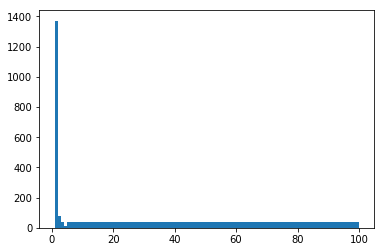

In [103]:
plt.hist([k.max_ratio[0] for k in mkts._results if len(k) == 2 and 100 > k.max_ratio[0] > 1], bins=[1, 2, 3, 4, 5, 10, 100])

In [111]:
20 * log10(1.5)

3.5218251811136247

In [116]:
len([k for k in mkts._results if k.max_ratio[0] < 1.05 and len(k) > 2])

21

In [128]:
print('   %d: %d' % (0, len([k for k in mkts._results if len(k) == 0])))
print('   %d: %d' % (1, len([k for k in mkts._results if len(k) == 1])))
print('   %d: %d' % (2, len([k for k in mkts._results if len(k) == 2])))
print('   %d: %d' % (3, len([k for k in mkts._results if len(k) == 3])))
print(' -%d: %d' % (10, len([k for k in mkts._results if 3 < len(k) <= 10])))
print('-%d: %d' % (100, len([k for k in mkts._results if 10 < len(k) <= 100])))
print('>%d: %d' % (100, len([k for k in mkts._results if len(k) > 100])))

   0: 0
   1: 1072
   2: 1745
   3: 230
 -10: 252
-100: 40
>100: 2


In [129]:
print('   %d: %d' % (0, len([k for k in mkts_a._results if len(k) == 0])))
print('   %d: %d' % (1, len([k for k in mkts_a._results if len(k) == 1])))
print('   %d: %d' % (2, len([k for k in mkts_a._results if len(k) == 2])))
print('   %d: %d' % (3, len([k for k in mkts_a._results if len(k) == 3])))
print(' -%d: %d' % (10, len([k for k in mkts_a._results if 3 < len(k) <= 10])))
print('-%d: %d' % (100, len([k for k in mkts_a._results if 10 < len(k) <= 100])))
print('>%d: %d' % (100, len([k for k in mkts_a._results if len(k) > 100])))

   0: 0
   1: 1052
   2: 1710
   3: 234
 -10: 252
-100: 41
>100: 2


In [85]:
print(len([k for k in mkts._results if k.max_ratio[0] == 0]))
print(len([k for k in mkts._results if k.max_ratio[0] == 1.0]))
print(len([k for k in mkts._results if 1.05 >= k.max_ratio[0] > 1.0]))
print(len([k for k in mkts._results if 1.5 >= k.max_ratio[0] > 1.05]))
print(len([k for k in mkts._results if k.max_ratio[0] > 1.5]))
print(len(mkts))

82
1165
503
775
816
3341


In [87]:
print(len([k for k in mkts_a._results if k.max_ratio[0] == 0]))
print(len([k for k in mkts_a._results if k.max_ratio[0] == 1.0]))
print(len([k for k in mkts_a._results if 1.05 >= k.max_ratio[0] > 1.0]))
print(len([k for k in mkts_a._results if 1.5 >= k.max_ratio[0] > 1.05]))
print(len([k for k in mkts_a._results if k.max_ratio[0] > 1.5]))
print(len(mkts_a))

32
1116
574
740
829
3291


## Find Interesting Markets
Look for case studies that show (1) a market split across suppliers and (2) a spread in impact scores among those suppliers

In [31]:
qs

In [32]:
qs[0].external_ref

'ReCiPe Midpoint (H), climate change, GWP100'

In [33]:
len(mkts)

3341

In [36]:
split_mkts = [m for m in mkts._results if max(m.exchange_values) < 0.6 and m.max_ratio[0] > 3]

In [37]:
len(split_mkts)

180

In [41]:
_sm_gen = (k for k in split_mkts)

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
def _add_stem_plot_to_ax(_ax, _xv, _yv, _scale, _color=[0, 0.62, 0.08], label=None, **kwargs):
    (mkrs, stems, baseline) = plt.stem(_xv, [_i * _scale for _i in _yv], label=label)
    plt.setp(baseline, visible=False)
    plt.setp(stems, color=_color, **{k: v for k, v in kwargs.items() if k in _stem_props})
    _mkr_set = {k: v for k, v in kwargs.items() if k in _marker_props}
    if len(_mkr_set) > 0:
        plt.setp(mkrs, **_mkr_set)

In [47]:
m.ratio(qs[0])

1.2808428212702667

market for tomato, fresh grade [GLO]
046967ce-ee30-4320-9ab5-f6fde6733595


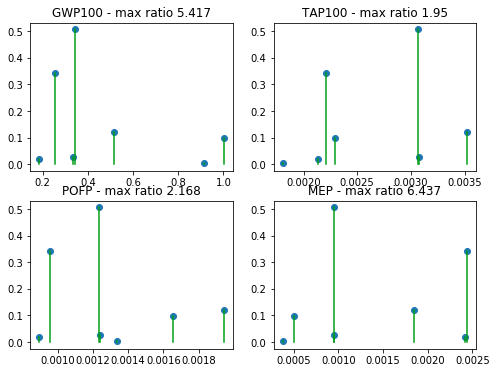

In [51]:
m = next(_sm_gen)
fig = plt.figure(figsize=(8, 6))
print('%s\n%s' % (m.market._name, m.market.external_ref))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    _add_stem_plot_to_ax(ax, m.scores(qs[i]), m.exchange_values, 1)
    ax.set_title('%s - max ratio %.4g' % (qs[i]['Indicator'], m.ratio(qs[i])))

In [52]:
big_ratio_mkts = [m for m in mkts._results if m.max_ratio[0] > 5]

In [53]:
len(big_ratio_mkts)

347

In [54]:
big_robust = [m for m in big_ratio_mkts if len(m) > 5]

In [55]:
len(big_robust)

102

In [63]:
from collections import Counter

<StemContainer object of 3 artists>

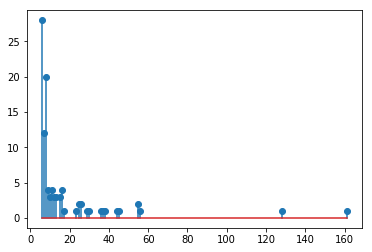

In [70]:
dat = sorted(k for k in Counter(len(k) for k in big_robust).items())
plt.stem(*zip(*dat))

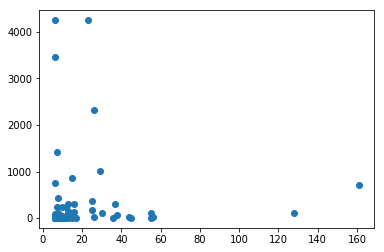

In [71]:
x1 = [len(k) for k in big_robust]
x2 = [k.max_ratio[0] for k in big_robust]

plt.scatter(x1, x2)

In [72]:
choice = (k for k in big_mkts if k.max_ratio[0] > 10 and len(k) > 10 and max(k.exchange_values) < 0.4)

In [158]:
next(choice).market.show()

ProcessRef catalog reference (45590532-cfd4-46a9-abb5-209e0d998f83)
origin: local.ecoinvent.3.4.cutoff
UUID: 45590532-cfd4-46a9-abb5-209e0d998f83
   Name: market for heat, district or industrial, other than natural gas
Comment: The shares of heat supplying activities from the different technologies have been estimated based on IEA statistics (http://www.iea.org/stats/electricitydata.asp?COUNTRY_CODE=25) for the year 2009. They amount to about 52% heat from coal and peat, 16% heat from oil, 18% heat from biofuels (modelled with biogas and wood), 11% heat from waste and 2% heat from other sources. The shares of the individual supplying activities do not necessarily correspond to reality and will have to be refined in future. 
==Local Fields==
   SpatialScope: Europe without Switzerland
  TemporalScope: {'begin': '2011-01-01', 'end': '2017-12-31'}
Classifications: ['EcoSpold01Categories: oil/cogeneration', 'ISIC rev.4 ecoinvent: 3530a: Steam and air conditioning supply based on liquid fue

## just for fun, some LCIA

In [73]:
res = qs[0].do_lcia(m_gly.lci())

local.ecoinvent.3.4.cutoff.index.20190118: /data/GitHub/2018/variability_jlca/catalog/archives/local.ecoinvent.3.4.cutoff.index.20190118_background.mat
Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/archives/local.ecoinvent.3.4.cutoff.index.20190118_background.mat.index.json.gz:
completed 63 iterations
Loading JSON data from /data/GitHub/2018/variability_jlca/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz:
local.ecoinvent.3.4.cutoff.index.20190118: /data/GitHub/2018/variability_jlca/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
19 new quantity entities added (19 total)
13459 new process entities added (13459 total)
4881 new flow entities added (4881 total)
Multiple CFs found: [25.0, 22.25]
Flow: [local.ecoinvent.3.4.cutoff] Methane, non-fossil [kg] [[kg]]
Quantity: ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
Multiple CFs found: [25.0

In [74]:
res.show_components()

ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA] kg CO2-Eq
------------------------------------------------------------
      1.33  [local.ecoinvent.3.4.cutoff] Carbon dioxide, from soil or biomass stock [kg]
     0.897  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
     0.414  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
      0.41  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
     0.141  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
    0.0963  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
    0.0877  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
    0.0195  [local.ecoinvent.3.4.cutoff] Methane, from soil or biomass stock [kg]
    0.0186  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
    0.0101  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
   0.00349  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
   0.00283  [local.ecoinvent.3.4.cutoff] Carbon dioxide, from soil or biomass stock [kg]
   0.00272  [lo

In [76]:
res.show_agg(key=lambda x: x._name)

ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA] kg CO2-Eq
------------------------------------------------------------
      1.45 =          1 x       1.45 Carbon dioxide, fossil [kg]
      1.33 =          1 x       1.33 Carbon dioxide, from soil or biomass stock [kg]
     0.514 =          1 x      0.514 Dinitrogen monoxide [kg]
     0.116 =          1 x      0.116 Methane, fossil [kg]
    0.0195 =          1 x     0.0195 Methane, from soil or biomass stock [kg]
   0.00272 =          1 x    0.00272 Sulfur hexafluoride [kg]
   0.00224 =          1 x    0.00224 Methane, non-fossil [kg]
  0.000594 =          1 x   0.000594 Methane, tetrafluoro-, R-14 [kg]
  0.000467 =          1 x   0.000467 Methane, tetrachloro-, R-10 [kg]
  0.000165 =          1 x   0.000165 Ethane, 1,2-dichloro-1,1,2,2-tetrafluoro-, CFC-114 [kg]
  0.000156 =          1 x   0.000156 Ethane, hexafluoro-, HFC-116 [kg]
  7.71e-05 =          1 x   7.71e-05 Methane, chlorodifluoro-, HCFC-22 [kg]
  5.18e-05 =  

In [77]:
qs[1].do_lcia(m_gly.lci()).show_agg(key=lambda x: x._name)

completed 63 iterations
ReCiPe Midpoint (H), terrestrial acidification, TAP100 [kg SO2-Eq] [LCIA] kg SO2-Eq
------------------------------------------------------------
    0.0108 =          1 x     0.0108 Ammonia [kg]
   0.00445 =          1 x    0.00445 Sulfur dioxide [kg]
   0.00309 =          1 x    0.00309 Nitrogen oxides [kg]
         0 =          1 x          0 Carbon dioxide, non-fossil [kg]
         0 =          1 x          0 Carbon dioxide, in air [kg]
    0.0183 ReCiPe Midpoint (H), terrestrial acidification, TAP100 [kg SO2-Eq] [LCIA]


In [78]:
lci = [x for x in m_gly.lci()]
len(lci)

completed 63 iterations


1860

In [79]:
[str(x) for x in lci[:50]]

['Output:     [1.16e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Aluminium [kg]',
 'Output:     [1.58e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Antimony [kg]',
 'Output:     [2.06e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Cadmium, ion [kg]',
 'Output:     [0.0112 [kg]]     [local.ecoinvent.3.4.cutoff] Calcium, ion [kg]',
 'Output:     [1.03e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Beryllium [kg]',
 'Output:     [8.8e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Vanadium, ion [kg]',
 'Output:     [1.08e-08 [kg]]     [local.ecoinvent.3.4.cutoff] Vanadium, ion [kg]',
 'Output:     [1.67e-05 [kg]]     [local.ecoinvent.3.4.cutoff] Silicon [kg]',
 'Output:     [6.83e-06 [kg]]     [local.ecoinvent.3.4.cutoff] Zinc, ion [kg]',
 'Output:     [5.03e-08 [kg]]     [local.ecoinvent.3.4.cutoff] Tungsten [kg]',
 'Output:     [0.000139 [kg]]     [local.ecoinvent.3.4.cutoff] Calcium, ion [kg]',
 'Output:     [0.00577 [kg]]     [local.ecoinvent.3.4.cutoff] Magnesium [kg]',
 'Output:     [4.67e-05 [kg]]  

In [80]:
from lcatools import enum

In [81]:
ipccs = enum(cat.query('local.lcia').quantities(Method='IPCC.2007', Indicator='100'))

 [00] [local.lcia.ecoinvent.3.1.2014_08_13] IPCC 2007 no LT, climate change, GWP 100a [kg CO2-Eq]
 [01] [local.lcia.ecoinvent.3.1.2014_08_13] IPCC 2007, climate change, GWP 100a [kg CO2-Eq]


In [82]:
_ = enum(ipccs[0].factors())

In [83]:
_ = enum(ipccs[1].factors())

 [00]   1.57 [GLO] [kg CO2-Eq / kg] Carbon monoxide, from soil or biomass stock (IPCC 2007, climate change, GWP 100a)
 [01] 2.28e+04 [GLO] [kg CO2-Eq / kg] Sulfur hexafluoride (IPCC 2007, climate change, GWP 100a)
 [02]    210 [GLO] [kg CO2-Eq / kg] Methane, dichlorofluoro-, HCFC-21 (IPCC 2007, climate change, GWP 100a)
 [03] 6.13e+03 [GLO] [kg CO2-Eq / kg] Ethane, 1,1,2-trichloro-1,2,2-trifluoro-, CFC-113 (IPCC 2007, climate change, GWP 100a)
 [04] 7.37e+03 [GLO] [kg CO2-Eq / kg] Ethane, chloropentafluoro-, CFC-115 (IPCC 2007, climate change, GWP 100a)
 [05] 7.14e+03 [GLO] [kg CO2-Eq / kg] Methane, bromotrifluoro-, Halon 1301 (IPCC 2007, climate change, GWP 100a)
 [06] 1.72e+04 [GLO] [kg CO2-Eq / kg] Nitrogen fluoride (IPCC 2007, climate change, GWP 100a)
 [07]     13 [GLO] [kg CO2-Eq / kg] Methane, monochloro-, R-40 (IPCC 2007, climate change, GWP 100a)
 [08]    8.7 [GLO] [kg CO2-Eq / kg] Methane, dichloro-, HCC-30 (IPCC 2007, climate change, GWP 100a)
 [09]    298 [GLO] [kg CO2-Eq /

In [84]:
ipccs[1].do_lcia(lci).show_components()

IPCC 2007, climate change, GWP 100a [kg CO2-Eq] [LCIA] kg CO2-Eq
------------------------------------------------------------
      1.33  [local.ecoinvent.3.4.cutoff] Carbon dioxide, from soil or biomass stock [kg]
     0.897  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
     0.414  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
      0.41  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
     0.141  [local.ecoinvent.3.4.cutoff] Carbon dioxide, fossil [kg]
    0.0963  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
    0.0877  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
    0.0195  [local.ecoinvent.3.4.cutoff] Methane, from soil or biomass stock [kg]
    0.0187  [local.ecoinvent.3.4.cutoff] Carbon monoxide, from soil or biomass stock [kg]
    0.0186  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
    0.0101  [local.ecoinvent.3.4.cutoff] Methane, fossil [kg]
   0.00349  [local.ecoinvent.3.4.cutoff] Dinitrogen monoxide [kg]
   0.00283  [local.eco